## **Exercise: Multiple Linear Regression**

### Problem Statement

A real estate company in India wants to predict the selling price of houses based on their characteristics. They have collected data (`house_prices_mlr.csv`) for houses including:

* area (in square feet)
* bedrooms (number of bedrooms)
* age (age of the house in years)
* price (in lakhs INR)

The goal is to build a Multiple Linear Regression model to predict house prices.

### Steps for Performing Multiple Linear Regression
1. Import Required Libraries
2. Load and Explore the Dataset
3. Visualize the Data
4. Define Features and Labels
5. Split Data into Training and Testing Sets
6. Train the Multiple Linear Regression Model
7. Model Coefficients and Intercept
8. Make Predictions
9. Evaluate Model Performance (R² Score, MAE, MSE, RMSE)
10. Visualize Predictions vs Actual

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

### 2. Load and Explore the Dataset

In [14]:
# Read the dataset
df = pd.read_csv('house_prices_mlr.csv')
df.head()

,area,bedrooms,age,price
0,850,2,5,46.2
1,900,2,4,42.1
2,1000,3,6,55.8
3,1200,3,8,62.9
4,1500,4,10,76.3


In [15]:
# Check for missing values, if any and some basic statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      70 non-null     int64  
 1   bedrooms  70 non-null     int64  
 2   age       70 non-null     int64  
 3   price     70 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 2.3 KB


In [16]:
df.describe()

,area,bedrooms,age,price
count,70.000000,70.000000,70.000000,70.000000
mean,1306.714286,3.214286,10.142857,68.285714
std,426.416553,1.101946,4.511774,23.010768
min,700.000000,1.000000,4.000000,32.400000
25%,980.000000,2.000000,6.000000,49.650000
50%,1250.000000,3.000000,9.000000,65.800000
75%,1600.000000,4.000000,13.000000,82.975000
max,2400.000000,5.000000,22.000000,127.800000


### 3. Visualize the Data

Pairplot helps visualize relationships and spot outliers.

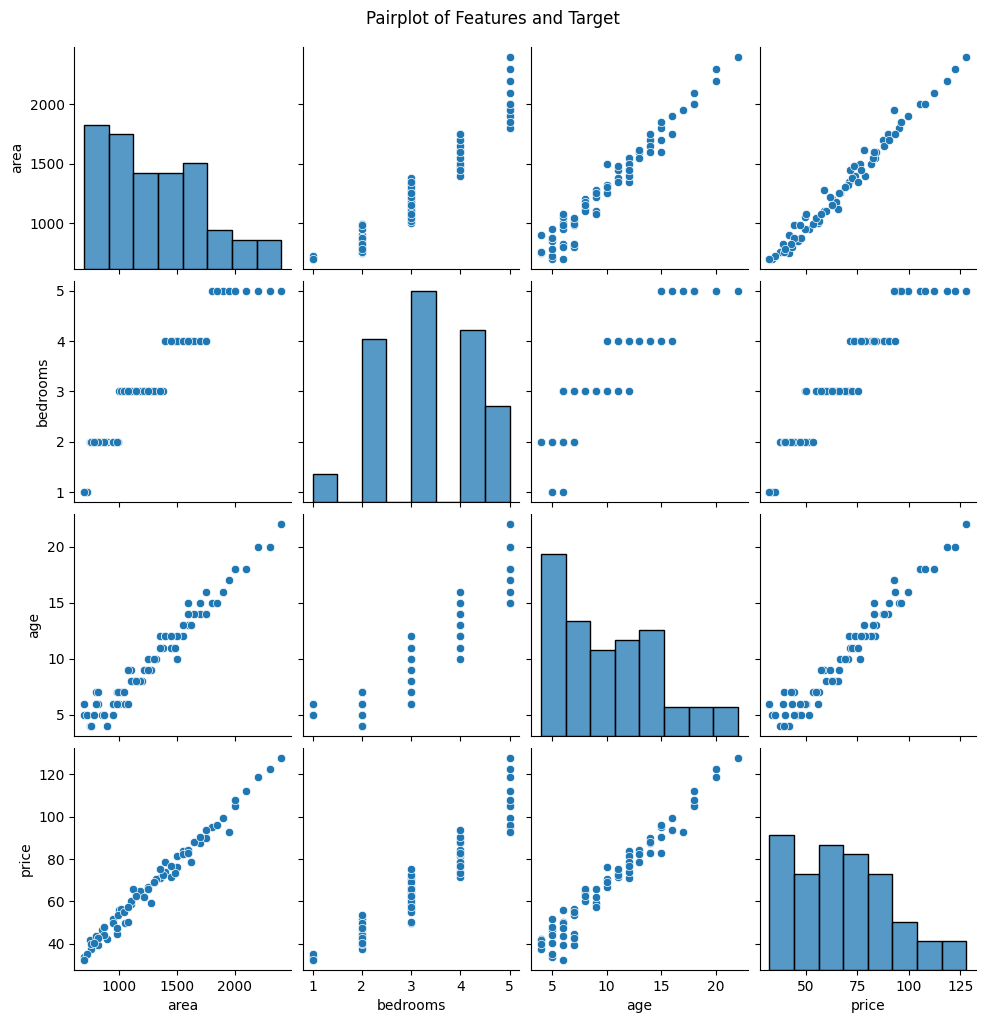

In [17]:
sns.pairplot(df)
plt.suptitle("Pairplot of Features and Target", y=1.02)
plt.show()

### 4. Define Features and Labels

In [18]:
X = df[['area', 'bedrooms', 'age']]
y = df['price']

### 5. Split Data into Training and Testing Sets

Splitting ensures we can evaluate model generalization.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Training samples: 56, Testing samples: 14


### 6. Train the Multiple Linear Regression Model

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 7. Model Coefficients and Intercept

Coefficients show the impact of each feature on price.

In [21]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [0.04131618 2.36544176 0.66999361]
Intercept: 0.3797940791342569


### 8. Make Predictions

In [22]:
# Predict on test set
y_pred = model.predict(X_test)

# Predict for a new house: 1200 Square Feet, 4 Bedrooms, 7 Years old
sample_pred = model.predict([[1200, 4, 7]])
print(f"Predicted price for [1200 Square Feet, 4 Bedrooms, 7 Years old]: {sample_pred[0]:.2f}")  

Predicted price for [1200 Square Feet, 4 Bedrooms, 7 Years old]: 64.11


### 10. Evaluate Model Performance

These metrics help assess prediction accuracy.

In [23]:
# R² Score
r2 = model.score(X_test, y_test)
print(f"R² Score: {r2:.3f}")

# MAE, MSE, RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

R² Score: 0.959
MAE: 3.42
MSE: 20.44
RMSE: 4.52


### 11. Visualize Predictions vs Actual

Points close to the red line indicate good predictions.

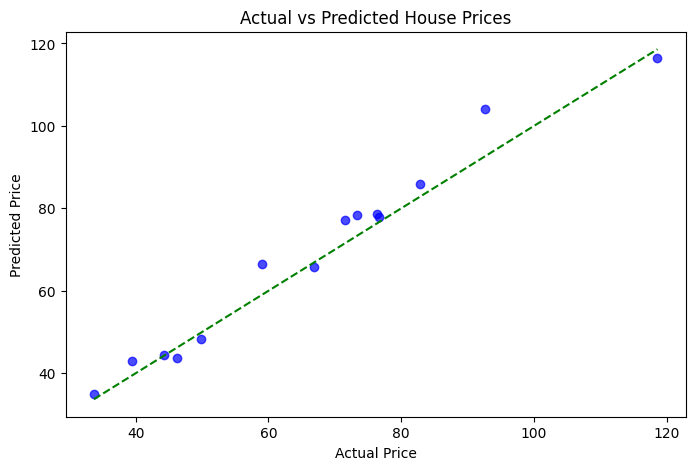

In [24]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()

### Summary

* This notebook demonstrated Multiple Linear Regression on a house prices dataset. 

* We visualized the data, trained a model, made predictions, and evaluated performance using R², MAE, MSE, and RMSE. 

* The model explains about 95.9% of the variance in house prices, indicating a strong fit (high R² score).

* The errors are low (MAE ≈ 3.42 lakhs, RMSE ≈ 4.52 lakhs), showing the model makes accurate predictions with small deviations.